Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


C:\Users\Olivi\AppData\Local\Temp\ipykernel_17004\1329041692.py:52: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  kw: pearsonr(data["G-Dragon"], data[kw])[0]  # correlation coefficient only


Correlation with G-Dragon:
Nike: nan
Peaceminusone: nan
Chanel: nan


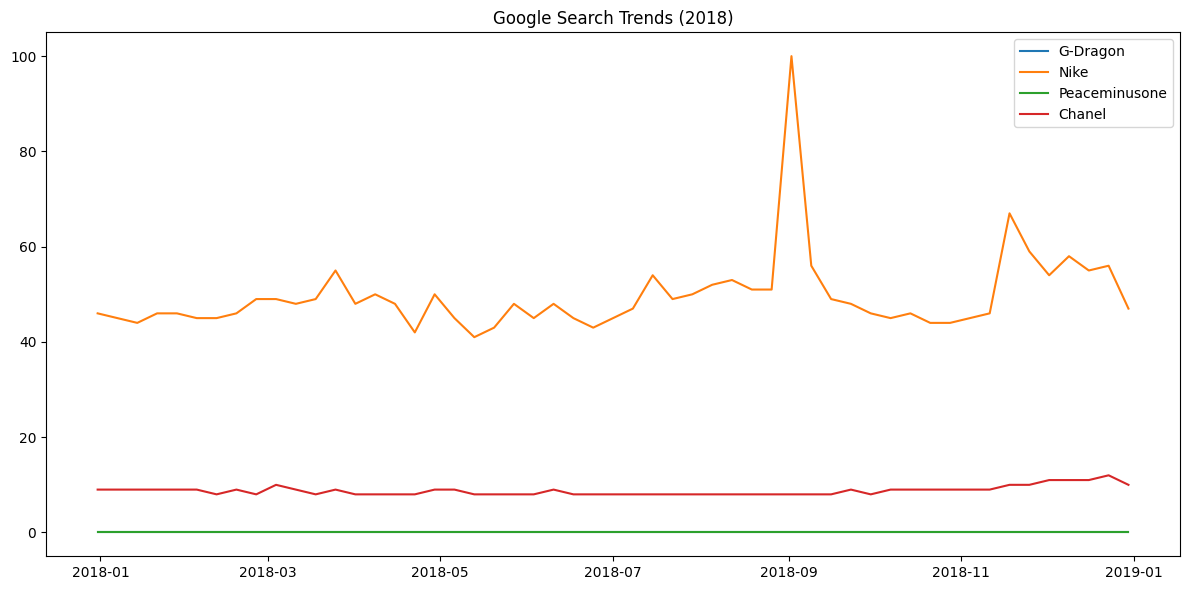

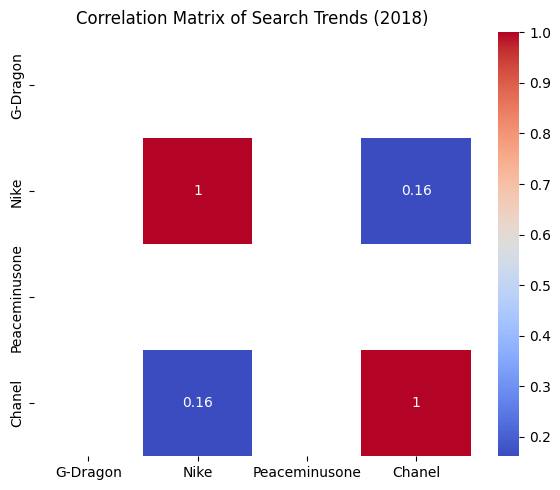

In [21]:
# -------------------------------
# Step 1: Setup & Libraries
# -------------------------------

%pip install matplotlib
%pip install seaborn
%pip install scipy

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

%pip install pytrends
from pytrends.request import TrendReq  # <-- Add this import

# -------------------------------
# Step 2: Data Gathering
# -------------------------------
pytrends = TrendReq(hl='en-US', tz=360)

keywords = ["G-Dragon", "Nike", "Peaceminusone", "Chanel"]

# Build Google Trends payload (2018 only)
pytrends.build_payload(
    kw_list=keywords,
    timeframe='2018-01-01 2018-12-31',
    geo=''  # leave empty for worldwide, or e.g., 'KR' for South Korea
)

data = pytrends.interest_over_time()
data = data.drop(columns=['isPartial'])  # remove helper column

# -------------------------------
# Step 3: Data Cleaning
# -------------------------------
# Ensure datetime index
data.index = pd.to_datetime(data.index)

# Normalization (optional: scale values 0–1 for fair comparison)
normalized = data / data.max()

# -------------------------------
# Step 4: Data Analysis
# -------------------------------
# Example: Correlation matrix
corr_matrix = data.corr(method='pearson')

# Pairwise correlations with G-Dragon
gdragon_corrs = {
    kw: pearsonr(data["G-Dragon"], data[kw])[0]  # correlation coefficient only
    for kw in keywords if kw != "G-Dragon"
}

print("Correlation with G-Dragon:")
for k, v in gdragon_corrs.items():
    print(f"{k}: {v:.3f}")

# -------------------------------
# Step 5: Data Visualisation
# -------------------------------
# Time-series plot
plt.figure(figsize=(12,6))
for col in data.columns:
    plt.plot(data.index, data[col], label=col)
plt.title("Google Search Trends (2018)")
plt.legend()
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Search Trends (2018)")
plt.tight_layout()
plt.show()
